IMPORTING LIBRARIES

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


IMPORTING DATASET

In [59]:
dataset  = pd.read_csv('Salary_Data.csv')
x=dataset.iloc[:,:-1].values
y= dataset.iloc[:,-1].values
print(x)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


SPLITTIG TRAINING AND TEST DATA

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

TRAINING


In [61]:
from sklearn.linear_model import LinearRegression
#creating a instance for the linaer regression class
regressor = LinearRegression()
#fit the model this will train the model
regressor.fit(x_train,y_train)



LinearRegression()

PREDTICT THE RESULTS

In [62]:
y_pred = regressor.predict(x_test)



VISUALIZING THE TRAINGING SET RESULTS


Text(0.5, 1.0, 'salary versue experience (training set)')

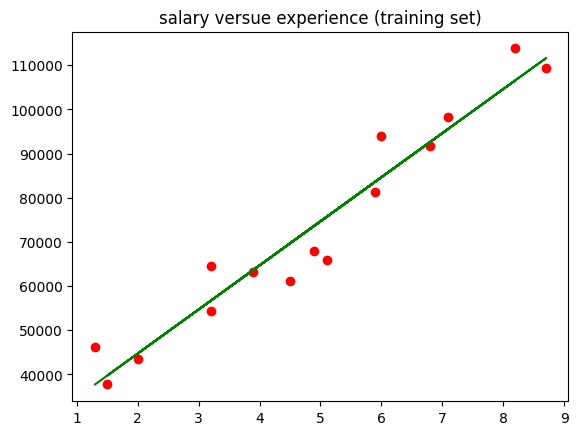

In [63]:
plt.scatter(x_train,y_train,color = 'red')
plt.plot(x_train,regressor.predict(x_train),color = 'green')
plt.title('salary versue experience (training set)')

VISUALIZING THE TEST SET RESULTS


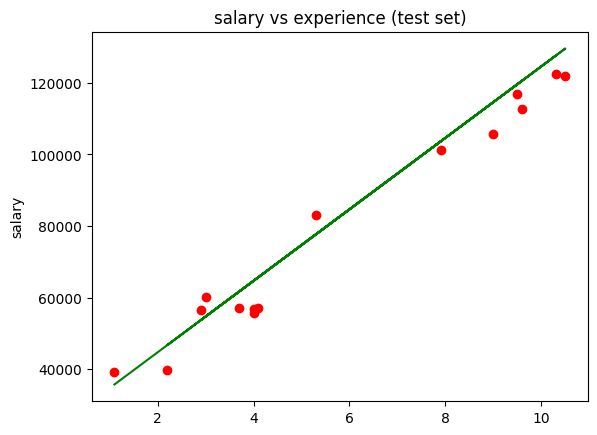

In [64]:
plt.scatter(x_test,y_test,color = 'red')
plt.plot(x_test,regressor.predict(x_test),color = "green")
plt.title('salary vs experience (test set)')
plt.ylabel('salary')
plt.show()


In [65]:
from sklearn.metrics import roc_auc_score,r2_score
print(r2_score(y_test, y_pred))

0.9550943825202389
